# Indian Rainfall Analysis

The 2019 Indian floods were a series of floods that affected over thirteen states in late July and early August 2019, due to incessant rains. At least 200 people died and about a million people were displaced. Karnataka and Maharashtra were the most severely affected states.

It was the heaviest monsoon in the last 25 years. More than 1600 people died between June and October 2019.

India being an agriculturally driven economy, it will be interesting to study the rainfall in India in the past decade to give us an idea of the changes in the pattern if there are any.


Source: [Open Gov Data Platform India - data.gov.in](https://data.gov.in/resources/subdivision-wise-rainfall-and-its-departure-1901-2015)

Let us work on the INDIAN RAINFALL DATA!

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
data = pd.read_csv('../data/rainfall in india 1901-2015.csv')
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


## Summary of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4112 non-null   float64
 3   FEB          4113 non-null   float64
 4   MAR          4110 non-null   float64
 5   APR          4112 non-null   float64
 6   MAY          4113 non-null   float64
 7   JUN          4111 non-null   float64
 8   JUL          4109 non-null   float64
 9   AUG          4112 non-null   float64
 10  SEP          4110 non-null   float64
 11  OCT          4109 non-null   float64
 12  NOV          4105 non-null   float64
 13  DEC          4106 non-null   float64
 14  ANNUAL       4090 non-null   float64
 15  Jan-Feb      4110 non-null   float64
 16  Mar-May      4107 non-null   float64
 17  Jun-Sep      4106 non-null   float64
 18  Oct-Dec      4103 non-null   float64
dtypes: flo

In [4]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
dtype: int64

## Finding years where all months data is missing

In [5]:
data.YEAR[data.iloc[:,2:14].isnull().all(axis=1)]

Series([], Name: YEAR, dtype: int64)

There is no year (or row) in the dataset where all the measurements from Jan-Dec are missing

In [6]:
# can might handle missing values in ANNUAL column by adding it ourselves
data['MY_ANNUAL'] = data.iloc[:,2:14].sum(axis=1)

In [7]:
data.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
Jan-Feb         6
Mar-May         9
Jun-Sep        10
Oct-Dec        13
MY_ANNUAL       0
dtype: int64

However, a better way in this analysis would be to replace it mean.

## Inspect the data, find missing values and replace them with appropriate values

In [8]:
## We can either replace subdivision means or means across all subdivision
data.groupby('SUBDIVISION').mean()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MY_ANNUAL
SUBDIVISION,,,,,,,,,,,,,,,,,,,
ANDAMAN & NICOBAR ISLANDS,1958.918182,52.637273,27.994545,31.824074,72.223148,357.056881,471.580556,400.042593,400.047222,439.482243,290.264815,233.744444,153.144860,2927.439423,80.632727,462.249533,1706.687850,675.416822,2876.093636
ARUNACHAL PRADESH,1965.824742,47.297917,91.116667,153.527368,263.836082,358.522680,647.373958,694.544792,495.229897,432.134021,194.686316,35.696842,24.502105,3418.857143,138.416667,777.686316,2271.422105,254.513830,3414.786598
ASSAM & MEGHALAYA,1958.000000,16.974783,31.441739,79.026957,203.115652,341.539130,510.161739,495.102609,404.593043,310.734783,152.118261,26.938261,8.951304,2580.695652,48.413043,623.687826,1720.590435,188.015652,2580.698261
BIHAR,1958.000000,13.386087,14.393913,10.124348,16.918261,53.081739,174.315652,324.441739,299.643478,217.384348,63.074783,7.178261,3.694783,1197.633913,27.776522,80.126957,1015.786087,73.953913,1197.637391
CHHATTISGARH,1958.000000,14.206957,19.259130,15.266957,16.773043,21.048696,198.266087,398.577391,389.873043,217.780000,63.660000,11.772174,5.248696,1371.728696,33.462609,53.092174,1204.500870,80.674783,1371.732174
COASTAL ANDHRA PRADESH,1958.000000,7.483478,12.923478,13.221739,26.740870,62.549565,123.693913,173.824348,175.923478,181.707826,185.511304,77.903478,11.420000,1052.904348,20.404348,102.515652,655.141739,274.835652,1052.903478
COASTAL KARNATAKA,1958.000000,1.937719,1.518261,6.357391,30.916522,122.787826,841.326087,1127.028696,713.618261,299.652174,184.552174,63.607826,12.613913,3408.409649,3.371053,160.051304,2981.618261,260.775652,3405.900000
EAST MADHYA PRADESH,1958.000000,19.401739,18.693913,13.637391,7.188696,9.273043,141.029565,371.378261,369.368696,194.236522,39.686087,12.705217,8.404348,1205.000000,38.094783,30.096522,1076.018261,60.800000,1205.003478
EAST RAJASTHAN,1958.000000,6.422609,5.417391,4.516522,3.144348,9.820000,63.399130,223.347826,218.277391,97.978261,14.360870,4.873913,3.651304,655.215652,11.837391,17.487826,602.998261,22.887826,655.209565


In [9]:
data.groupby('SUBDIVISION').fillna(data.groupby('SUBDIVISION').mean())

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,MY_ANNUAL
0,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3,3373.2
1,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7,3520.7
2,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6,2957.4
3,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0,3079.6
4,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8,2566.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4111,2011,5.1,2.8,3.1,85.9,107.2,153.6,350.2,254.0,255.2,117.4,184.3,14.9,1533.7,7.9,196.2,1013.0,316.6,1533.7
4112,2012,19.2,0.1,1.6,76.8,21.2,327.0,231.5,381.2,179.8,145.9,12.4,8.8,1405.5,19.3,99.6,1119.5,167.1,1405.5
4113,2013,26.2,34.4,37.5,5.3,88.3,426.2,296.4,154.4,180.0,72.8,78.1,26.7,1426.3,60.6,131.1,1057.0,177.6,1426.3
4114,2014,53.2,16.1,4.4,14.9,57.4,244.1,116.1,466.1,132.2,169.2,59.0,62.3,1395.0,69.3,76.7,958.5,290.5,1395.0


In [10]:
data.mean()

YEAR         1958.218659
JAN            18.957320
FEB            21.805325
MAR            27.359197
APR            43.127432
MAY            85.745417
JUN           230.234444
JUL           347.214334
AUG           290.263497
SEP           197.361922
OCT            95.507009
NOV            39.866163
DEC            18.870580
ANNUAL       1411.008900
Jan-Feb        40.747786
Mar-May       155.901753
Jun-Sep      1064.724769
Oct-Dec       154.100487
MY_ANNUAL    1414.379252
dtype: float64

In [11]:
## lets just replace it with mean across all subdivisions, since our aim would be to create a model, 
## however, any imputaion like this should happen before the train/test split and seperately for train and test sets,
## to avoid data-or-information-leak

data.fillna(data.mean(), inplace=True)

## Plot the mean annual rainfall and note down your observations regarding the same

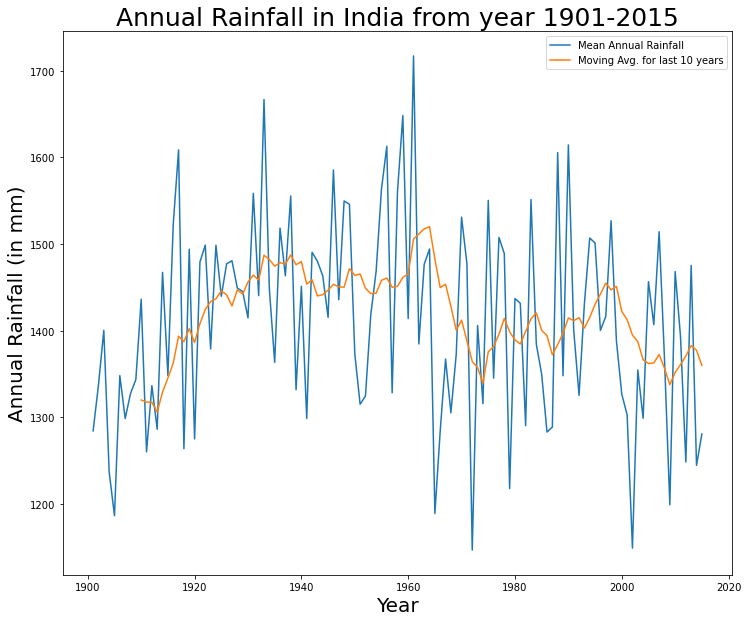

In [12]:
mean_annual_rainfall = (data.groupby('YEAR').ANNUAL.mean())
#mean_annual_rainfall.name = 'Mean Annual Rainfall'
mean_annual_rainfall.plot(legend=True, label='Mean Annual Rainfall', figsize=(12,10))

ma10 = mean_annual_rainfall.rolling(10).mean()
#ma10.name = 'Moving Avg. for last 10 years'
ma10.plot(legend=True,label='Moving Avg. for last 10 years')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Annual Rainfall (in mm)',fontsize=20)
plt.title('Annual Rainfall in India from year 1901-2015', fontsize=25)
plt.show()

## Insights:
* Highest average rainfall in India was recored in the year 1961.This was because in 1961 India received multiple cyclones.City of Pune was flooded in the year 1961 which is remembered as Panshet Flood.

* Year 1965-66 were twin drought years and there was food scarcity in India.Prime Minister Lal Bahadur Shastri gave the Slogan Jai Jawan Jai Kissan to people of India.This lead to green revolution in India making India a food surplus country in the coming decades.

* The red line is the 10 year moving average of the rainfall in India.It seems since 1960s there is slight dip in the rainfall in India.Now a days due to global warming the period of Monsoon season has shortned.We see more of erratic rainfall pattern.This needs more study.

## Similarly analyze the seasonal rainfall as per subdivisions and note down your observations

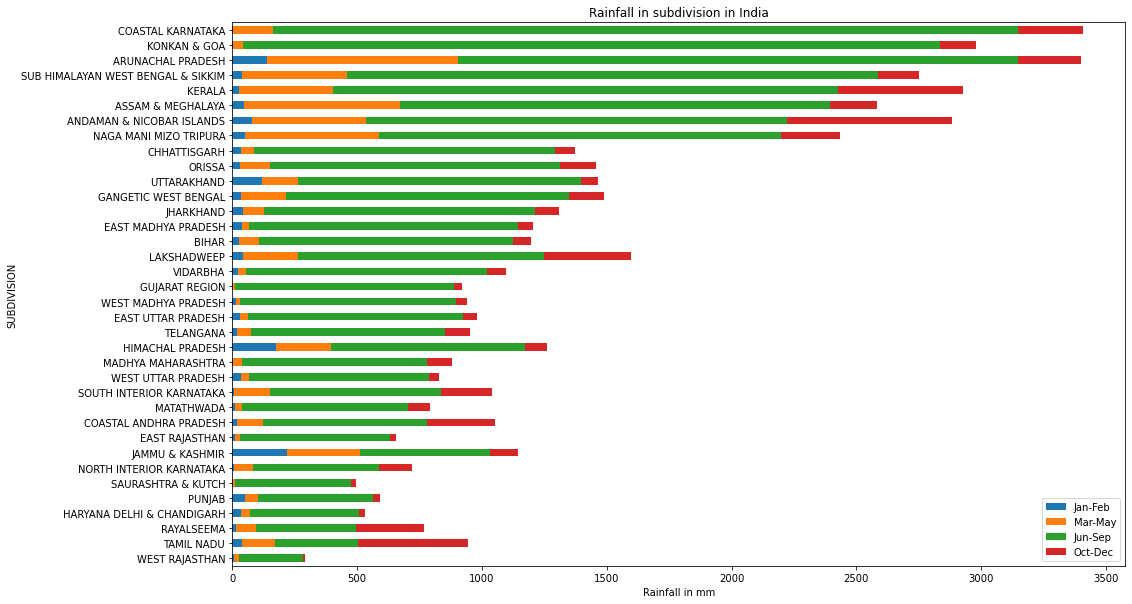

In [13]:
(data
 .loc[:,['SUBDIVISION','Jan-Feb','Mar-May', 'Jun-Sep','Oct-Dec']]
 .groupby('SUBDIVISION')
 .mean()
 .sort_values('Jun-Sep')
 .plot.barh(stacked=True,figsize=(16,10), title='Rainfall in subdivision in India'))
plt.xlabel('Rainfall in mm')
plt.show()

## Insights:

* From the above graph we can see that majority of rainfall is received in the month of Jun-Sep which is the Monsoon season.Oct-Dec is time of return monsoon.Jan-Feb are the winter months.Mar-May is time for Summer rains.

* Coastal Karnataka,Arunachal Pradesh,Konkan Goa and Kerala receive highest rainfall.

* Rajastan,Gujrat,Haryana and Punjab receives low rainfall.Interesting thing is that Punjab and Haryana have high agricultural output despite low rainfall.Their water requirnments are met by rivers and canals.



## With boxplot analyze the distribution of rainfall in various states and onote down your observations

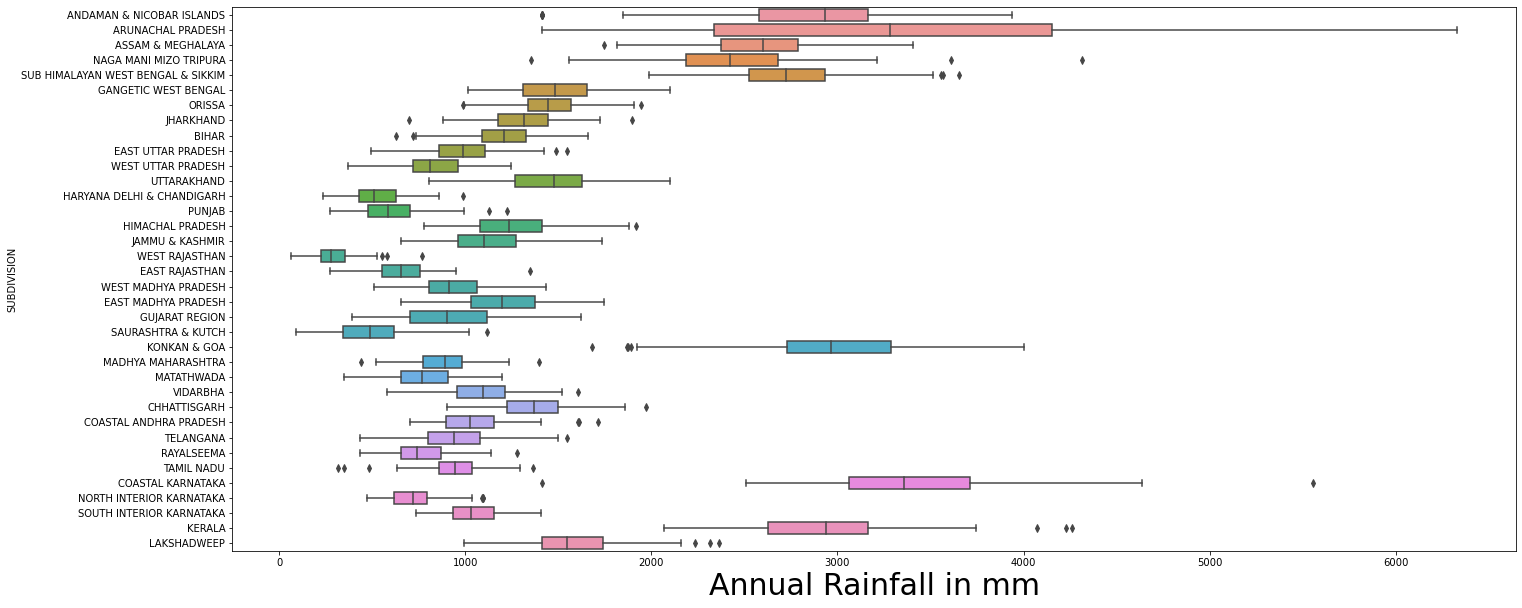

In [14]:
plt.figure(figsize=(23,10))
ax=sns.boxplot(y='SUBDIVISION', x='ANNUAL', data=data, width=0.8)
ax.set_xlabel('Annual Rainfall in mm',fontsize=30)
plt.show()

## Insights:
We can see Subdivision Arunachal Pradesh shows highest highest difference between Maximum and Minimum rainfall received.Costal Karnataka receives close to 3400 mm of Annual rainfall which is the highest in India.West Rajastan receives the least amount of rainfall.



## Analyze the rainfall through years in Kerala and note down your observations

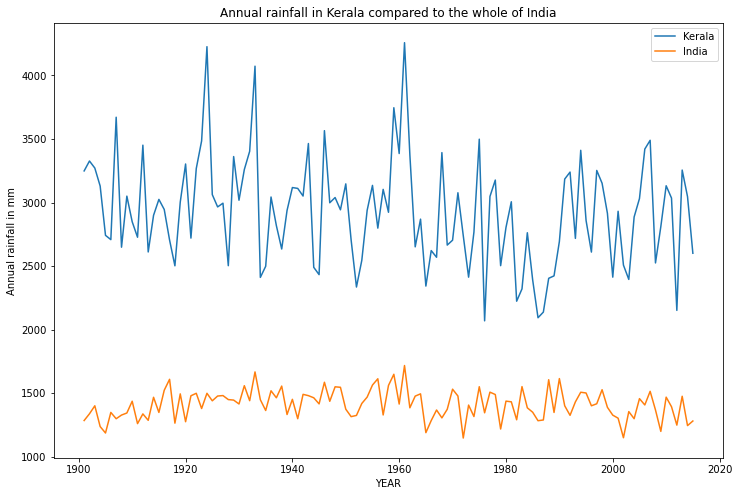

In [15]:
Kerala = data.loc[data.SUBDIVISION=='KERALA',:]
Kerala.groupby("YEAR").ANNUAL.mean().plot(legend=True, label='Kerala')
mean_annual_rainfall.plot(figsize=(12,8), 
                          title='Annual rainfall in Kerala compared to the whole of India',
                          legend=True, label='India')
plt.ylabel('Annual rainfall in mm')
plt.show()

## Insight:
Prior to 2018 Kerala had major flood in the year 1924 which is evident in the data.Contrary to popular belief Kerala received maximum annual rainfall in year 1961(4257 mm) and not 1924(4226 mm).In 2018 Kerala has received 2226.4 mm of rain in the monsoon season.This is 40% more than the average rainfall.

![Districts of Kerala](../graph2.png)

## Read the district wise rainfall data

In [16]:
Dist = pd.read_csv('../data/district wise rainfall normal.csv')
Dist.head()

,STATE_UT_NAME,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3
2,ANDAMAN And NICOBAR ISLANDS,N & M ANDAMAN,32.7,15.9,8.6,53.4,343.6,503.3,465.4,460.9,454.8,276.1,198.6,100.0,2913.3,48.6,405.6,1884.4,574.7
3,ARUNACHAL PRADESH,LOHIT,42.2,80.8,176.4,358.5,306.4,447.0,660.1,427.8,313.6,167.1,34.1,29.8,3043.8,123.0,841.3,1848.5,231.0
4,ARUNACHAL PRADESH,EAST SIANG,33.3,79.5,105.9,216.5,323.0,738.3,990.9,711.2,568.0,206.9,29.5,31.7,4034.7,112.8,645.4,3008.4,268.1


## Annual rainfall in different districts of Kerala

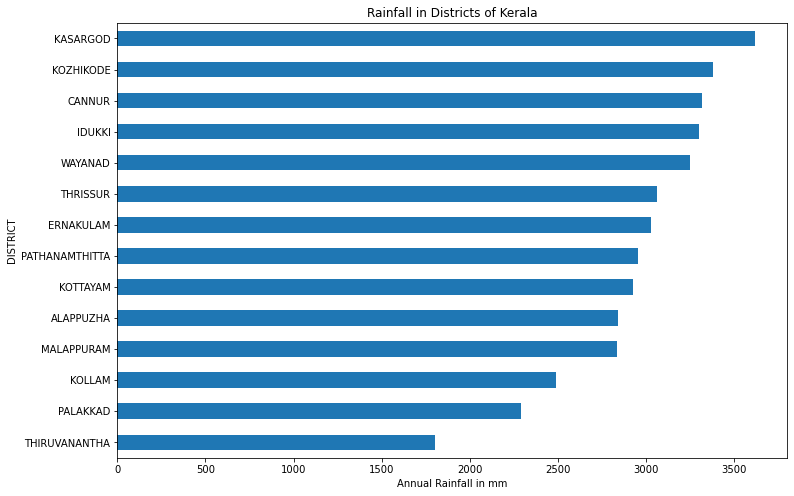

In [17]:
Kerala_Dist = Dist.loc[Dist.STATE_UT_NAME=='KERALA',:]
(Kerala_Dist
 .sort_values('ANNUAL')
 .plot.barh(x='DISTRICT',
            y='ANNUAL', 
            title="Rainfall in Districts of Kerala",
            figsize=(12,8),
           legend=False)
)
plt.xlabel('Annual Rainfall in mm')
plt.show()

## Insight:
North west districts are among the highest receiving rainfall places annually. 

## Find out the districts with least rainfall

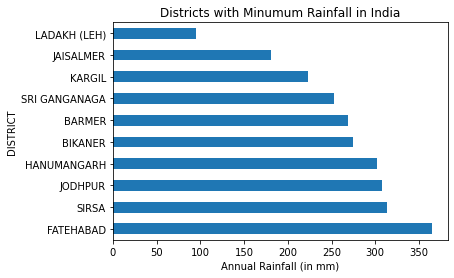

In [18]:
(Dist
 .sort_values('ANNUAL',ascending=False)
 .tail(10)
 .plot.barh(x='DISTRICT',y='ANNUAL',
           legend=False,
           title='Districts with Minumum Rainfall in India')
)
plt.xlabel('Annual Rainfall (in mm)')
plt.show()

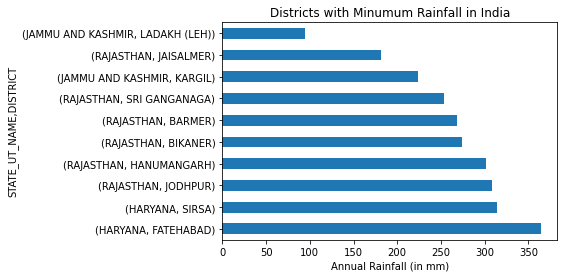

In [19]:
## If there are multiple Districts with same name, then we can be explicit by grouping State and District
(Dist
 .groupby(['STATE_UT_NAME', 'DISTRICT'])
 .ANNUAL.mean()
 .sort_values(ascending=False)
 .tail(10)
 .plot.barh(x='DISTRICT',y='ANNUAL',
           legend=False,
           title='Districts with Minumum Rainfall in India')
)
plt.xlabel('Annual Rainfall (in mm)')
plt.show()

## Insight:
Ladak which is part of Jammu and Kashmir receives 94.6 mm. Ladak and Kargil which receive less rainfall are part of Indian State Jammu and Kashmir.Jaisalmer,Sri Ganganaga and Barmer are part of Rajastan State.



## Similarly, find districts with maximum rainfall

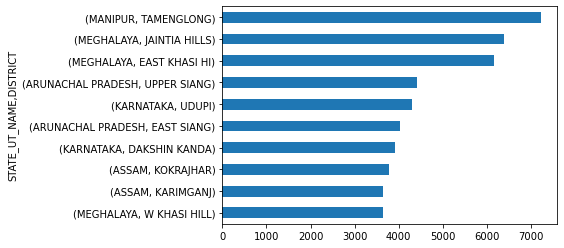

In [20]:

(Dist
 .groupby(['STATE_UT_NAME', 'DISTRICT'])
 .ANNUAL.mean()
 .sort_values(ascending=True)
 .tail(10)
 .plot.barh(x='DISTRICT',y='ANNUAL',
           legend=False)
)


## Insights:
Districts from North eastern states - Manipur, Meghalaya, Arunachal Pradesh and also Southern state of Karnataka receive max rainfall 